# Numeros Primos

Un entero positivo $p > 1$ es un número primo si sus unicos divisores son
$\pm 1$ y $\pm p$. Un entero positivo n que no es primo es llamado compuesto.

Si bien existe una infinidad de números primos, la cantidad de numeros primos menor que $n$ es finita. El teorema del numero primo nos entrega una cota asintótica para la función de conteo de primos $\pi(n)$.

\begin{align}
\pi(n) \approx \frac{n}{\operatorname{ln} (n)-B}
\end{align}

Donde $B$ es la constante de Legendre (https://mathworld.wolfram.com/PrimeNumberTheorem). 

La aproximación depende del tamaño de $x$ y se puede ver en la siguiente tabla:



In [2]:
import math 

phi= lambda n : x/math.log(n-1.08366)
prob= lambda n : 1./math.log(n)

print('|{:^20}|{:^20}|{:^20}|'.format('n','Phi(n)','Prob(n)'))
print('----------------------------------------------------------------')
for i in range(3,17):
    x=10**i
    print('|{0:^20.2e}|{1:^20.2f}|{2:^20.2f}|'.format(x,phi(x),prob(x)))

|         n          |       Phi(n)       |      Prob(n)       |
----------------------------------------------------------------
|      1.00e+03      |       144.79       |        0.14        |
|      1.00e+04      |      1085.75       |        0.11        |
|      1.00e+05      |      8685.90       |        0.09        |
|      1.00e+06      |      72382.42      |        0.07        |
|      1.00e+07      |     620420.69      |        0.06        |
|      1.00e+08      |     5428681.03     |        0.05        |
|      1.00e+09      |    48254942.44     |        0.05        |
|      1.00e+10      |    434294481.91    |        0.04        |
|      1.00e+11      |   3948131653.67    |        0.04        |
|      1.00e+12      |   36191206825.27   |        0.04        |
|      1.00e+13      |  334072678387.12   |        0.03        |
|      1.00e+14      |  3102103442166.09  |        0.03        |
|      1.00e+15      | 28952965460216.79  |        0.03        |
|      1.00e+16      | 27

Esto implica que podemos generar una gran cantidad de numeros primos, sin embargo comprobar que son primos es generalmente dificil.

In [3]:
import random

def gen_number(size=128):
    return random.getrandbits(size)

def isPrime(n):
    if n<2:
        return False
    for i in range(2,int(math.sqrt(n)+1)):
        if n % i == 0:
            return False
    return True

In [4]:
n=gen_number(1024)
print('El numero {0} es primo ? : {1}'.format(n,isPrime(n)))

El numero 125499165824775594751101233603167888706477436475236620780043117859322715682155898785844595895053519929554765180262395017153941687919693525378863989583831900017081146797984102383252269455890890456792014274916534836154570934832130578525105518461889303851299296115935960202892367085590968383053571419977004948944 es primo ? : False


Probabilidad empirica=0.11, media=110.00 
Probabilidad aproximada 0.36, media=360.67


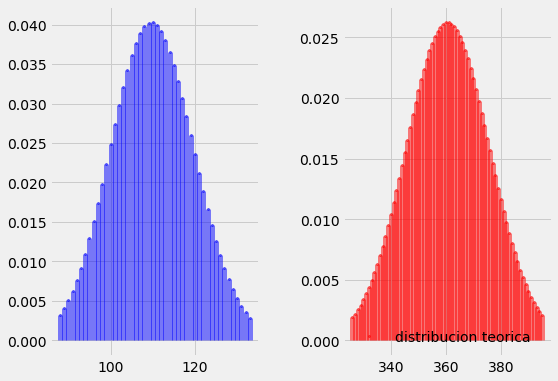

In [43]:
from scipy.stats import binom
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

def trial_division(size,num_samples):
    num_primes=0
    for i in range(num_samples):
        n=gen_number(size)
        if isPrime(n):
            num_primes+=1
    return num_primes/num_samples

num_samples=1000
p_s=trial_division(2**4,num_samples)
print('Probabilidad empirica={0:0.2f}, media={1:0.2f} '.format(p_s,num_samples*p_s))

p_n=prob(2**4)
print('Probabilidad aproximada {0:0.2f}, media={1:0.2f}'.format(p_n,num_samples*p_n))

x = np.arange(binom.ppf(0.01,num_samples, p_s),
              binom.ppf(0.99, num_samples, p_s))

fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.plot(x, binom.pmf(x, num_samples, p_s), 'bo', ms=2,alpha=0.5, label='distribucion empirica')
ax.vlines(x, 0, binom.pmf(x, num_samples, p_s), colors='b', lw=5, alpha=0.5)

x2 = np.arange(binom.ppf(0.01,num_samples, p_n),
              binom.ppf(0.99, num_samples, p_n))
ax = fig.add_subplot(1, 2, 2)
ax.plot(x2, binom.pmf(x2, num_samples, p_n), 'ro', ms=2,alpha=0.5, label='distribucion teorica')
ax.vlines(x2, 0,  binom.pmf(x2, num_samples, p_n),  colors='r', lw=5, alpha=0.5)
ax.legend(loc='best', frameon=False)

plt.show()


El tiempo para realizar la prueba de primalidad mediante fuerza bruta crece exponencialmente con respecto al numero. Una alternativa es utilizar el terorema de Fermat. Si $n$ es primo y $a$ un entero positivo no divisible por $p$, entonces:

\begin{align}
a^{n-1} \equiv 1 ( \operatorname{mod} n)
\end{align}

In [7]:
from random import randint
 
def isProbablyPrime(n, k = 5):
    if (n < 2 ):
        return False
    output = True
    for i in range(0, k):
        a = randint(1, n-1)
        # pow(x, y, z=None)=x**y % z
        if (pow(a, n-1, n) != 1):
            return False 
    return output

In [44]:
n=gen_number(1024)
print('El numero {0} es primo ? : {1}'.format(n,isProbablyPrime(n)))

El numero 108966844302064395242432836241603646373432656858278781967902409895089349941245529050270301353455752770475749361222226891228478271808430078473198786712457215751662455965662049678538984912279479168845936281979875317538811786064333404873708031211181338604246229576514194943614982314928585960448233167755167201743 es primo ? : False


# Algoritmo Rabin-Miller

```
Input: n > 3, an odd integer to be tested for primality;
Input: k, a parameter that determines the accuracy of the test
Output: composite if n is composite, otherwise probably prime
write n − 1 as 2s·d with d odd by factoring powers of 2 from n − 1
LOOP: repeat k times:
   pick a randomly in the range [2, n − 2]
   x ← ad mod n
   if x = 1 or x = n − 1 then do next LOOP
   for r = 1 .. s − 1
      x ← x2 mod n
      if x = 1 then return composite
      if x = n − 1 then do next LOOP
   return composite
return probably prime
```

http://inventwithpython.com/cracking/chapter22.html

[1] Rabin, Michael (1980). "Probabilistic algorithm for testing primality". Journal of Number Theory 12 (1): 128-138. doi:10.1016/0022-314X(80)90084-0.

In [38]:
def rabinMiller(num,k=5):
    if num % 2 == 0 or num < 2:
        return False # Rabin-Miller doesn't work on even integers.
    if num == 3:
        return True
    s = num - 1
    t = 0
    while s % 2 == 0:
        s = s // 2
        t += 1
    for trials in range(k): 
        a = random.randrange(2, num - 1)
        v = pow(a, s, num)
        if v != 1: # this test does not apply if v is 1.
            i = 0
            while v != (num - 1):
                if i == t - 1:
                    return False
                else:
                    i = i + 1
                    v = (v ** 2) % num
    return True



In [61]:
import time

while True:
    n=gen_number(2**10)
    r=rabinMiller(n)
    if r:
        break

print('Numero : {0}'.format(n))
t1=time.clock()
r=isProbablyPrime(n)
t2=time.clock()
print('Fermat Test={0} {1:0.8f}[s]'.format(r,t2-t1))
t1=time.clock()
r=rabinMiller(n)
t2=time.clock()
print('Rabin-Miller Test={0} {1:0.8f}[s]'.format(r,t2-t1))


Numero : 146720009993470692584721237647535947874111681800743720399785823389344619404401704122989862982333943421416396139550204449403185494582016113587529637149871261979377345873942002781947767163452421325561003806620641088652095258634452827202168477672180124940689744026522006321080400936788498898807439155572124039221
Fermat Test=True 0.02146000[s]
Rabin-Miller Test=True 0.02143400[s]


# Tarea

 1. Encontrar la probabilidad de generar numeros aleatorios de $n=1024$ bits.
 2. Completar la tabla anterior con las probabilidades calculadas de manera empirica.